# Лабораторная работа №2. Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

## Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Обработка пропусков данных

В качестве набора данных для обработки пропусков был выбран набор данных [датасет обмена валют](https://www.kaggle.com/datasets/robikscube/exhange-rates-to-usd-from-imforg-updated-daily).

### Загрузка и первичный анализ данных

In [3]:
data = pd.read_csv('data/exchange_rate_to_usd.csv')
data.head()

,date,chinese_yuan_to_usd,euro_to_usd,japanese_yen_to_usd,uk_pound_to_usd,us_dollar_to_usd,algerian_dinar_to_usd,australian_dollar_to_usd,bahrain_dinar_to_usd,botswana_pula_to_usd,...,south_african_rand_to_usd,sri_lankan_rupee_to_usd,swedish_krona_to_usd,swiss_franc_to_usd,thai_baht_to_usd,trinidadian_dollar_to_usd,tunisian_dinar_to_usd,uae_dirham_to_usd,uruguayan_peso_to_usd,bolivar_fuerte_to_usd
0,2004-01-02,NaN,0.794155,NaN,0.559973,1.0,NaN,1.328551,2.659574,NaN,...,0.149813,0.010313,0.138889,NaN,NaN,NaN,NaN,0.272294,NaN,NaN
1,2004-01-05,0.120817,0.790077,0.009355,0.555679,1.0,NaN,1.310616,2.659574,4.326195,...,0.157233,0.010277,0.139665,0.812876,0.025393,NaN,NaN,0.272294,NaN,NaN
2,2004-01-06,0.120815,0.783945,0.009412,0.549179,1.0,NaN,1.304121,2.659574,4.354452,...,0.154440,0.010245,NaN,0.813008,0.025508,0.159727,NaN,0.272294,NaN,NaN
3,2004-01-07,0.120814,0.788706,0.009413,0.551268,1.0,NaN,1.302592,2.659574,4.418913,...,NaN,NaN,0.139519,0.807363,0.025602,0.159393,NaN,0.272294,NaN,NaN
4,2004-01-08,0.120814,0.791515,0.009421,0.551815,1.0,NaN,1.302253,2.659574,4.464286,...,0.150602,0.010222,0.138600,0.802053,0.025630,NaN,NaN,0.272294,NaN,NaN


In [4]:
# размер набора данных
data.shape

(4596, 52)

In [5]:
# типы колонок
data.dtypes

date                           object
chinese_yuan_to_usd           float64
euro_to_usd                   float64
japanese_yen_to_usd           float64
uk_pound_to_usd               float64
us_dollar_to_usd              float64
algerian_dinar_to_usd         float64
australian_dollar_to_usd      float64
bahrain_dinar_to_usd          float64
botswana_pula_to_usd          float64
brazilian_real_to_usd         float64
brunei_dollar_to_usd          float64
canadian_dollar_to_usd        float64
chilean_peso_to_usd           float64
colombian_peso_to_usd         float64
czech_koruna_to_usd           float64
danish_krone_to_usd           float64
hungarian_forint_to_usd       float64
icelandic_krona_to_usd        float64
indian_rupee_to_usd           float64
indonesian_rupiah_to_usd      float64
iranian_rial_to_usd           float64
israeli_new_shekel_to_usd     float64
kazakhstani_tenge_to_usd      float64
korean_won_to_usd             float64
kuwaiti_dinar_to_usd          float64
libyan_dinar

In [6]:
# проверим есть ли пропущенные значения
data.isnull().sum()

date                             0
chinese_yuan_to_usd            331
euro_to_usd                     59
japanese_yen_to_usd            250
uk_pound_to_usd                 77
us_dollar_to_usd                 0
algerian_dinar_to_usd         1862
australian_dollar_to_usd       203
bahrain_dinar_to_usd           834
botswana_pula_to_usd           299
brazilian_real_to_usd          439
brunei_dollar_to_usd           279
canadian_dollar_to_usd         336
chilean_peso_to_usd            221
colombian_peso_to_usd          538
czech_koruna_to_usd            186
danish_krone_to_usd            203
hungarian_forint_to_usd        955
icelandic_krona_to_usd         927
indian_rupee_to_usd            380
indonesian_rupiah_to_usd      1056
iranian_rial_to_usd           1834
israeli_new_shekel_to_usd      332
kazakhstani_tenge_to_usd      1497
korean_won_to_usd              310
kuwaiti_dinar_to_usd           652
libyan_dinar_to_usd            836
malaysian_ringgit_to_usd       301
mauritian_rupee_to_u

In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 4596


### Обработка пропусков

In [8]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка chinese_yuan_to_usd. Тип данных float64. Количество пустых значений 331, 7.2%.
Колонка euro_to_usd. Тип данных float64. Количество пустых значений 59, 1.28%.
Колонка japanese_yen_to_usd. Тип данных float64. Количество пустых значений 250, 5.44%.
Колонка uk_pound_to_usd. Тип данных float64. Количество пустых значений 77, 1.68%.
Колонка algerian_dinar_to_usd. Тип данных float64. Количество пустых значений 1862, 40.51%.
Колонка australian_dollar_to_usd. Тип данных float64. Количество пустых значений 203, 4.42%.
Колонка bahrain_dinar_to_usd. Тип данных float64. Количество пустых значений 834, 18.15%.
Колонка botswana_pula_to_usd. Тип данных float64. Количество пустых значений 299, 6.51%.
Колонка brazilian_real_to_usd. Тип данных float64. Количество пустых значений 439, 9.55%.
Колонка brunei_dollar_to_usd. Тип данных float64. Количество пустых значений 279, 6.07%.
Колонка canadian_dollar_to_usd. Тип данных float64. Количество пустых значений 336, 7.31%.
Колонка chilean_peso_to_usd. 

Обработаем пропуски с помощью встроенных средств библиотеки scikit-learn. Будем использовать медианное заполнение.

In [9]:
from sklearn.impute import SimpleImputer

strategy = 'most_frequent'

def fill_data(dataset, column):
    temp_data = dataset[[column]]

    imp_num = SimpleImputer(strategy=strategy)
    data_num_imp: np.ndarray = imp_num.fit_transform(temp_data)
    
    return data_num_imp.transpose()[0]

In [10]:
# Характеристики датасета до заполнения
data.describe()

,chinese_yuan_to_usd,euro_to_usd,japanese_yen_to_usd,uk_pound_to_usd,us_dollar_to_usd,algerian_dinar_to_usd,australian_dollar_to_usd,bahrain_dinar_to_usd,botswana_pula_to_usd,brazilian_real_to_usd,...,south_african_rand_to_usd,sri_lankan_rupee_to_usd,swedish_krona_to_usd,swiss_franc_to_usd,thai_baht_to_usd,trinidadian_dollar_to_usd,tunisian_dinar_to_usd,uae_dirham_to_usd,uruguayan_peso_to_usd,bolivar_fuerte_to_usd
count,4265.000000,4537.000000,4346.000000,4519.000000,4596.0,2734.000000,4393.000000,3762.000000,4297.000000,4157.000000,...,4166.000000,3501.000000,4342.000000,4422.000000,4163.000000,4078.000000,1880.000000,4384.000000,2558.000000,2382.000000
mean,0.146098,0.803428,0.009722,0.648937,1.0,0.010288,1.245431,2.659574,8.306978,0.394113,...,0.106106,0.008307,0.131890,0.983442,0.029912,0.154680,0.543665,0.272294,0.037068,0.226329
std,0.013097,0.075243,0.001286,0.093346,0.0,0.002244,0.163869,0.000000,2.208811,0.134277,...,0.033652,0.001201,0.017375,0.111758,0.002524,0.004712,0.113509,0.000003,0.009975,0.134899
min,0.120811,0.625391,0.007978,0.475737,1.0,0.006990,0.904568,2.659574,3.783579,0.168447,...,0.052677,0.005468,0.095812,0.755002,0.023759,0.147299,0.330016,0.272109,0.021767,0.000004
25%,0.141082,0.745601,0.008869,0.570727,1.0,0.008422,1.100958,2.659574,6.489293,0.274499,...,0.072206,0.007519,0.116837,0.890650,0.028532,0.148394,0.435517,0.272294,0.029150,0.159129
50%,0.147057,0.801603,0.009275,0.639100,1.0,0.009213,1.293661,2.659574,8.051530,0.407266,...,0.100712,0.008724,0.132035,1.011941,0.030381,0.156351,0.538750,0.272294,0.035147,0.159129
75%,0.156887,0.869112,0.010183,0.734268,1.0,0.012667,1.364443,2.659574,10.548523,0.497834,...,0.136893,0.009259,0.147116,1.068876,0.031885,0.158611,0.634689,0.272294,0.046586,0.385579
max,0.164123,0.964878,0.013182,0.867227,1.0,0.014027,1.795010,2.659574,12.360939,0.652018,...,0.177778,0.010338,0.171160,1.378740,0.034892,0.162798,0.745045,0.272294,0.054493,0.466287


In [11]:
for col in data.columns:
    new_data = fill_data(data, col)
    data[col] = new_data

In [12]:
# Заполнение прошло успешно
data.isnull().any().any()

False

In [13]:
# Характеристики датасета после заполнения
data.describe()

,chinese_yuan_to_usd,euro_to_usd,japanese_yen_to_usd,uk_pound_to_usd,us_dollar_to_usd,algerian_dinar_to_usd,australian_dollar_to_usd,bahrain_dinar_to_usd,botswana_pula_to_usd,brazilian_real_to_usd,...,south_african_rand_to_usd,sri_lankan_rupee_to_usd,swedish_krona_to_usd,swiss_franc_to_usd,thai_baht_to_usd,trinidadian_dollar_to_usd,tunisian_dinar_to_usd,uae_dirham_to_usd,uruguayan_peso_to_usd,bolivar_fuerte_to_usd
count,4596.000000,4596.000000,4596.000000,4596.000000,4596.0,4596.000000,4596.000000,4.596000e+03,4596.000000,4596.000000,...,4596.000000,4596.000000,4596.000000,4596.000000,4596.000000,4596.000000,4596.000000,4596.000000,4596.000000,4596.000000
mean,0.144278,0.803572,0.009689,0.648732,1.0,0.009037,1.248424,2.659574e+00,8.465336,0.403491,...,0.109057,0.008121,0.132214,0.985421,0.029956,0.155228,0.523431,0.272294,0.042858,0.193958
std,0.014208,0.074769,0.001257,0.092574,0.0,0.002301,0.160812,4.441375e-16,2.218524,0.130923,...,0.033329,0.001100,0.016941,0.110075,0.002406,0.004698,0.074513,0.000003,0.009872,0.102749
min,0.120811,0.625391,0.007978,0.475737,1.0,0.006990,0.904568,2.659574e+00,3.783579,0.168447,...,0.052677,0.005468,0.095812,0.755002,0.023759,0.147299,0.330016,0.272109,0.021767,0.000004
25%,0.130736,0.746603,0.008897,0.572533,1.0,0.007200,1.107757,2.659574e+00,6.540222,0.293720,...,0.073588,0.007524,0.117393,0.902425,0.028666,0.148621,0.509424,0.272294,0.034753,0.159129
50%,0.146475,0.804764,0.009218,0.637836,1.0,0.008169,1.299883,2.659574e+00,8.547009,0.432031,...,0.114985,0.007652,0.134363,1.015718,0.030382,0.157165,0.509424,0.272294,0.050125,0.159129
75%,0.156360,0.865202,0.010076,0.731469,1.0,0.010159,1.359111,2.659574e+00,10.718114,0.492296,...,0.137646,0.009074,0.146260,1.066155,0.031736,0.159310,0.509424,0.272294,0.050125,0.159129
max,0.164123,0.964878,0.013182,0.867227,1.0,0.014027,1.795010,2.659574e+00,12.360939,0.652018,...,0.177778,0.010338,0.171160,1.378740,0.034892,0.162798,0.745045,0.272294,0.054493,0.466287


## Кодирование категориальных признаков

В качестве набора данных для кодирование категориальных признаков был выбран набор данных [World Happiness Report 2022](https://www.kaggle.com/datasets/mathurinache/world-happiness-report-2022).

### Загрузка и первичный анализ данных

In [14]:
data = pd.read_csv('data/2022.csv', decimal=',')
data.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [15]:
# размер набора данных
data.shape

(147, 12)

### Кодирование категориальных признаков

Используем кодирование целочисленными значениями.

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
transformed = encoder.fit_transform(data['Country'])

data['Country'] = transformed
data['Country'].unique()

array([ 40,  32,  53, 125,  94,  77, 124, 101,  59,  95,   6,   5,  58,
        45,  21, 138, 137,  31,  11,  41,   8, 119,  28, 136, 113, 126,
       117, 110, 122, 139,  60,  67,  82,  76, 118,  37, 104,  16,  48,
        65,  30,  71, 115,  23,  96,  85,  29, 108,  36,  68,  52,  84,
       140,  63,  50, 109,   3,  47, 121, 107, 129,  86,  62,  69,  10,
        25,  14,  87,  33,  80,  13,  24, 105, 106,  88,  34, 142, 133,
        99, 111,  51,   4, 127,  93,  17,  75,  55,  61, 100,   1, 120,
         7,  43,   9,  70,   2,  74, 135,  27,  89,  90,  20, 114,  97,
        44,  42,  57, 141,  49,  56,  46, 132,  18,  19,  12,  26, 134,
        98,  66, 131, 102, 103,  81,  92,  38,  91, 123,  78,  35,  22,
        39, 143,  83,  64, 130,  54, 144,  79, 128, 116,  73,  15, 112,
       145,  72,   0, 146])

## Масштабирование данных

Используем тот же датасет

### MinMax

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [18]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Happiness score']])

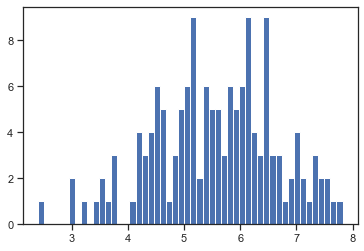

In [19]:
plt.hist(data['Happiness score'], 50)
plt.show()

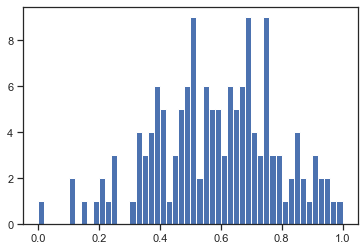

In [20]:
plt.hist(sc1_data, 50)
plt.show()

### Масштабирование данных на основе Z-оценки

In [21]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Happiness score']])

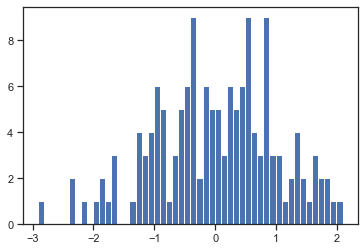

In [22]:
plt.hist(sc2_data, 50)
plt.show()